In [144]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.diagnostic import normal_ad
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import lognorm

In [145]:
coefs = pd.read_csv("coefs.csv")
coefs.head()

,Unnamed: 0,mod0lift,mod0drag,mod1lift,mod1drag,mod2lift,mod2drag,mod3lift,mod3drag,mod4lift,mod4drag,mod5lift,mod5drag,mod6lift,mod6drag,mod7lift,mod7drag
0,0,0.092580,0.077162,-0.062036,0.109246,0.210903,0.048726,0.123508,0.070160,0.326784,0.034760,-0.454851,0.146616,-0.251662,0.125027,0.031000,0.072737
1,1,-0.583380,0.144976,-0.571472,0.147383,-0.460350,0.124467,-0.630357,0.163468,-0.589324,0.165572,-0.227635,0.091337,-0.456234,0.103121,-0.585173,0.139452
2,2,-0.044227,0.070344,-0.034863,0.065023,0.091336,0.042134,-0.099108,0.078988,-0.311128,0.096182,0.172003,0.037605,-0.067790,0.044362,-0.010213,0.051675
3,3,0.268562,0.043931,0.245292,0.040383,0.336779,0.025666,0.253643,0.046725,0.057647,0.046556,0.429040,0.028601,0.174987,0.023626,0.260003,0.027771
4,4,0.488738,0.047312,0.466800,0.042952,0.567848,0.024924,0.483431,0.044705,0.278278,0.036559,0.634991,0.030558,0.384887,0.020337,0.507514,0.024773


In [199]:
lift = coefs.to_numpy()[:,1:].T[::2].T
drag = coefs.to_numpy()[:,1:].T[1::2].T
n_airfoils = lift.shape[0]
n_angles = lift.shape[1]
#print(n_airfoils)
lift = lift.reshape(-1)
drag = drag.reshape(-1)

In [131]:
airfoils = ['A' + str(i) for i in range(1, n_airfoils+1)]
angles = ['B' + str(i) for i in range(1, n_angles+1)]

In [133]:
design = pd.DataFrame(np.array(np.meshgrid(angles, airfoils)).T.reshape(-1, 2), 
                      columns=['Angle_of_attack', 'Airfoil'])
design['Lift'] = lift
design['Drag'] = drag
design

,Angle_of_attack,Airfoil,Lift,Drag
0,B1,A1,0.092580,0.077162
1,B1,A2,-0.062036,0.109246
2,B1,A3,0.210903,0.048726
3,B1,A4,0.123508,0.070160
4,B1,A5,0.326784,0.034760
...,...,...,...,...
123,B8,A12,1.232331,0.254038
124,B8,A13,1.439392,0.247348
125,B8,A14,0.864697,0.312822
126,B8,A15,0.658250,0.206156


In [137]:
Lift_model = ols('Lift ~ Angle_of_attack + Airfoil', data=design).fit()
Drag_model = ols('Drag ~ Angle_of_attack + Airfoil', data=design).fit()

In [138]:
liftanova = anova_lm(Lift_model)
draganova = anova_lm(Drag_model)

In [139]:
print(draganova)
print(liftanova)

                    df    sum_sq   mean_sq          F        PR(>F)
Angle_of_attack    7.0  0.680990  0.097284  70.430695  8.792201e-37
Airfoil           15.0  0.028888  0.001926   1.394251  1.636681e-01
Residual         105.0  0.145034  0.001381        NaN           NaN
                    df     sum_sq   mean_sq           F        PR(>F)
Angle_of_attack    7.0  48.978244  6.996892  126.847066  2.948601e-48
Airfoil           15.0   1.031418  0.068761    1.246576  2.499833e-01
Residual         105.0   5.791807  0.055160         NaN           NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    A1     A2   0.0345    1.0 -0.7038 0.7727  False
    A1     A3   0.1627 0.9974 -0.5755  0.901  False
    A1     A4  -0.0074    1.0 -0.7456 0.7308  False
    A1     A5  -0.0906 0.9999 -0.8289 0.6476  False
    A1     A6   0.1545 0.9981 -0.5837 0.8928  False
    A1     A7   0.0055    1.0 -0.7327 0.7437  False
    A1     A8   0.0845    1.0 -0.6537 0.8227  False
    A2     A3   0.1283 0.9994 -0.6099 0.8665  False
    A2     A4  -0.0418    1.0 -0.7801 0.6964  False
    A2     A5  -0.1251 0.9995 -0.8633 0.6131  False
    A2     A6   0.1201 0.9996 -0.6181 0.8583  False
    A2     A7   -0.029    1.0 -0.7672 0.7092  False
    A2     A8   0.0501    1.0 -0.6882 0.7883  False
    A3     A4  -0.1701 0.9965 -0.9084 0.5681  False
    A3     A5  -0.2534 0.9639 -0.9916 0.4848  False
    A3     A6  -0.0082    1.0 -0.7464   0.73  False
    A3     A

/tmp/ipykernel_12456/2276014053.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.unique(design['Airfoil']))


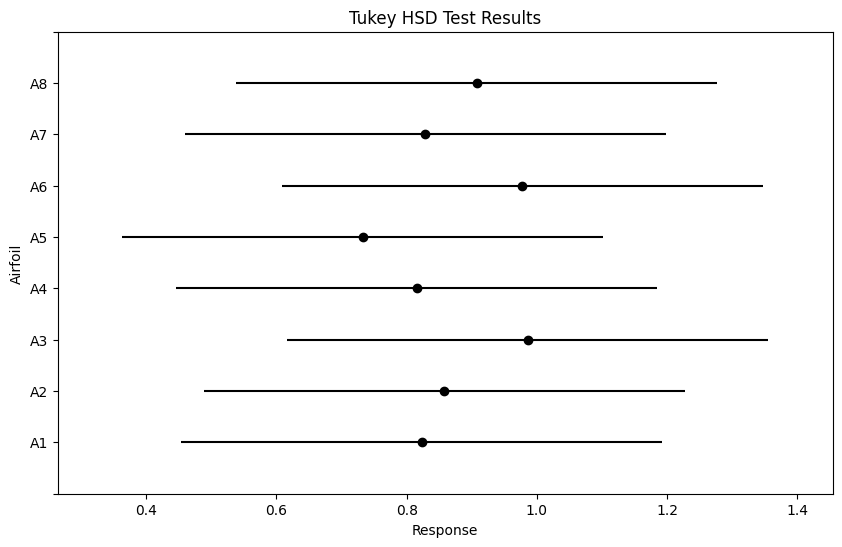

In [59]:
tukey_results = pairwise_tukeyhsd(design['Lift'], design['Airfoil'])
print(tukey_results)
fig, ax = plt.subplots(figsize=(8, 6))

# Compute the y-tick positions for the bar chart
ax.set_yticklabels(np.unique(design['Airfoil']))

# Plot the bar chart
tukey_results.plot_simultaneous(ax=ax)

# Add labels and title
ax.set_xlabel('Response')
ax.axvline(x=0.0)
ax.set_ylabel('Airfoil')
ax.set_title('Tukey HSD Test Results')
plt.show()